# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

**Deep Neural Networks**

The goal of the exercise is to use Deep Neural Network (DNN) models, implemented in *Keras*, on a classification problem: we want to train DNNs to recognize and distinguish between the ten handwritten digits (0-9).

Deep Neural Networks are NNs with more hidden layers.

For this task, we use the MNIST dataset: $70000$ handwritten digits, represented by square image divided into a $28\times 28$ pixel grid, where each pixel can take on 256 gradation of the gray color.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

seed=0
np.random.seed(seed) # fix random seed
tf.compat.v1.set_random_seed(seed)

#### Step 1: Load and Process the Data

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data. We will use them in the following exercises.

Once we have loaded the data, we need to format it in the correct shape.

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


#### Step 2: Define the Neural Net and its Architecture

We construct our DNN using Keras's `Sequential()` class to instantiate a model and adding different deep layers one by one using the `add()` method (in these first steps we focus on `Dense` layers for simplicity). Every `Dense()` layer accepts as required arguments the number of neurons and the type of activation function for the layer (here we use `relu`).
In the first layer we also specify the shape of the input and in the last one the size of the softmax output to match the number of categories. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically.

In [4]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, this is the cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. To optimize the weights of the net, we choose SGD. While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points.

In [5]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Step 4: Train the model

We train our DNN in minibatches. Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs. Each epoch corresponds to using all the train data divided in minibatches. Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or `validation_data`. To monitor the training procedure for every epoch, we set `verbose=True`. 

In [6]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7280 - accuracy: 0.7885 - val_loss: 0.3028 - val_accuracy: 0.9176
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3727 - accuracy: 0.8941 - val_loss: 0.2340 - val_accuracy: 0.9324
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3016 - accuracy: 0.9159 - val_loss: 0.1969 - val_accuracy: 0.9421
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2598 - accuracy: 0.9275 - val_loss: 0.1722 - val_accuracy: 0.9479
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2301 - accuracy: 0.9351 - val_loss: 0.1572 - val_accuracy: 0.9503


#### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

313/313 [==============================] - 1s 3ms/step - loss: 0.1572 - accuracy: 0.9503

 Model performance:
– Test loss: 0.1571795791387558
– Test accuracy: 0.9502999782562256 



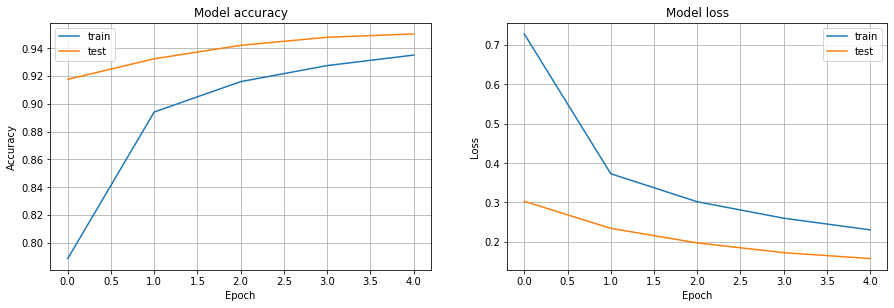

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print('\n' , 'Model performance:')
print('– Test loss:', score[0])
print('– Test accuracy:', score[1], '\n')

# look into training history

plt.figure(figsize=(15, 10))

# summarize history for accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title('Model accuracy')

# summarize history for loss
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title('Model loss')

plt.show()

Dropout, during training, slices off some artificial neurons, thus, training accuracy suffers.

Dropout, during testing, turns itself off and allows all of the ‘weak classifiers’ in the neural network to be used. Thus, testing accuracy improves with respect to training accuracy.

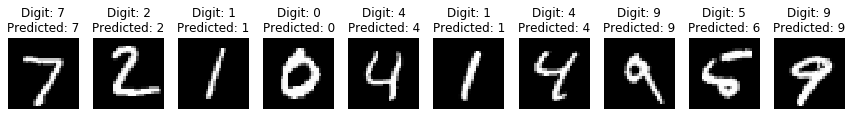

In [8]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Exercise 12.1

By keeping fixed all the other parameters, we use different optimizers, *SGD*, *Adam*, *RMSprop*, *Adagrad* and *Adadelta*, and compare their performances.

**Note**: DNNs with different optimizers were trained in DNN_training.ipynb and models were saved to use them here for comparison.


SGD 

Model performance:
– Test loss: 0.1571795791387558
– Test accuracy: 0.9502999782562256 



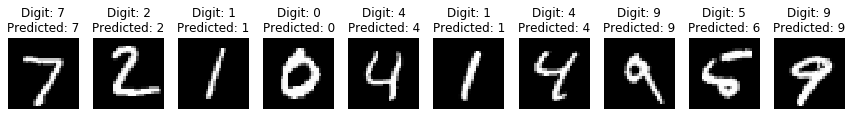


Adam 

Model performance:
– Test loss: 0.07408866286277771
– Test accuracy: 0.9810000061988831 



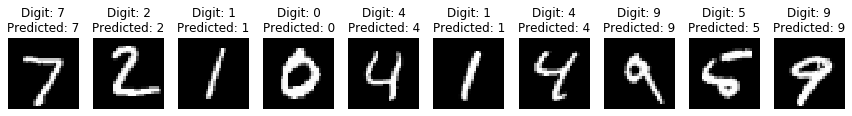


RMSprop 

Model performance:
– Test loss: 0.16304917633533478
– Test accuracy: 0.9747999906539917 



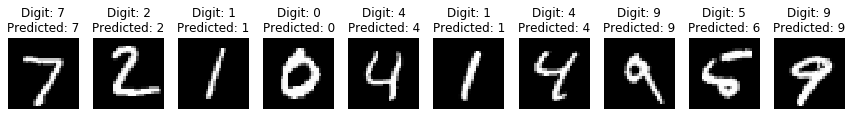


Adagrad 

Model performance:
– Test loss: 0.32455649971961975
– Test accuracy: 0.9153000116348267 



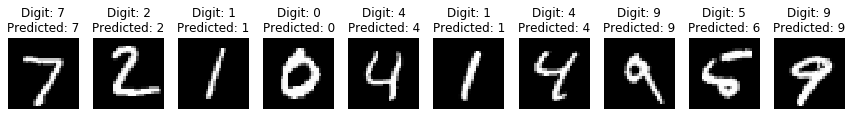


Adadelta 

Model performance:
– Test loss: 1.4465314149856567
– Test accuracy: 0.753600001335144 



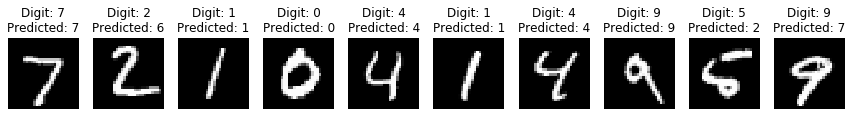

In [9]:
opt=['SGD', 'Adam', 'RMSprop','Adagrad','Adadelta']

for l in range(5):
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
    model_DNN=load_model('models/'+opt[l])
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)
    predictions = model_DNN.predict(X_test)
    
    print()
    print(opt[l],"\n")
    print('Model performance:')
    print('– Test loss:', score[0])
    print('– Test accuracy:', score[1], "\n")
    
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    
    fig = plt.figure(figsize=(15, 15))
    for i in range(10):    
        ax = plt.subplot(3, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()

Most of the optimizers work very well: *SGD*, *Adam* and *RMSprop* have accuracy $> 95 \%$.

The only one reconizing a bad written $5$ is *Adam*, which has the best performance, while *Adadelta* fails in recognizing three digits and has the worst performance.

### Exercise 12.2

**Convolutional Neural Nets**

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. This can be done with the use of convolutional layers in our DNN, which compute the convolution of the input with a serie of filters, thus creating a Convolutional Neural Network (CNN). We also add pooling layers to the architecture, which coarse-grain the input maintaining the spatial structure.

To this end, we first need to reshape the training and test input data as follows:

In [10]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Then, we define the architecture of our DCNN's layers:

- Convolutional: 10 filters 5x5 with stride $s=1 \quad$ - dimension of the image: $28x28x1 \rightarrow 24x24x10$
- MaxPooling: a filter 2x2 with $s=2 \quad$ $\rightarrow 12x12x10$
- Convolutional: 16 filters 5x5 with $s=1 \quad$ $\rightarrow 8x8x16$
- MaxPooling: a filter 2x2 with $s=2 \quad$ $\rightarrow 4x4x16$
- Flatten: unroll the 3D image to 1D $\quad$ $\rightarrow 4x4x16=256$
- Dense: fully connected layer with activation function='relu'
- Dropout: with rate 0.5
- Dense: fully connected layer with activation function='softmax', with 10 possible outputs (corresponding to the 10 digits)

In [11]:
def create_CNN():
    # instantiate model
    model = Sequential()

    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, kernel_size=(5, 5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


We train our DCNN and evaluate its performance proceeding exactly as before:

In [12]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2259 - accuracy: 0.9291 - val_loss: 0.0546 - val_accuracy: 0.9818
Epoch 2/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0772 - accuracy: 0.9767 - val_loss: 0.0461 - val_accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0341 - val_accuracy: 0.9894
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0283 - accuracy: 0.9901


Model performance:
Test loss: 0.028308797627687454
Test accuracy: 0.9901000261306763


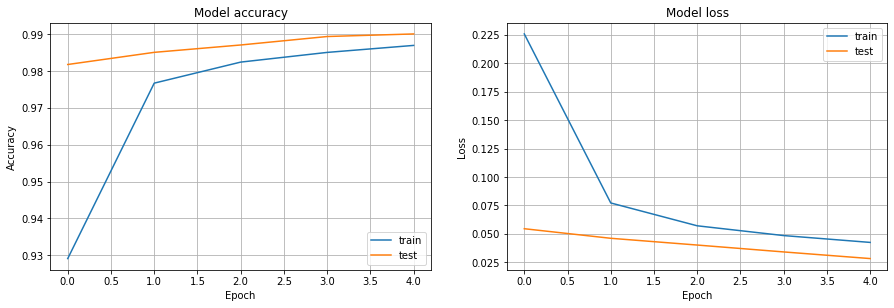

In [13]:
# print performance
print('Model performance:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15, 10))

# summarize history for accuracy
plt.subplot(221)
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title('Model accuracy')

# summarize history for loss
plt.subplot(222)
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title('Model loss')

plt.show()

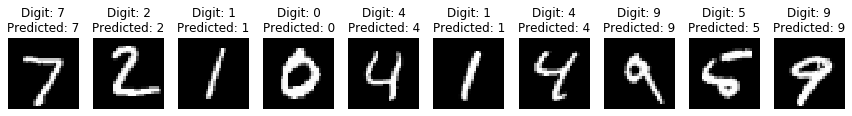

In [14]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

We can notice that our DCNN is able to recognize all the prevous digits and that it also has better model performances than the DNNs used before.

### Exercise 12.3

We want now to test our DCNN on handwritten digits and see if it is able to recognize them.

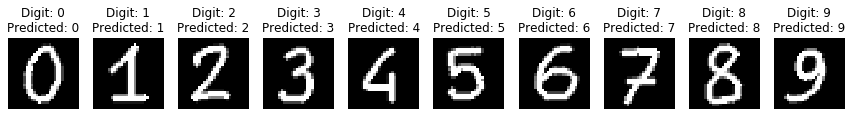

In [15]:
plt.figure(figsize=(15, 15)) 

for d in range(10): 
    digit_filename = "digits/"+str(d)+".png"
    digit_in = Image.open("digits/"+str(d)+".png").convert('L')

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    
    ax = plt.subplot(3, 10, d + 1) 
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1, img_rows, img_cols, 1)
    prediction=model_CNN.predict(data)
    
    plt.title("Digit: "+str(d)+"\nPredicted: "+str(np.argmax(prediction)))   
    
    plt.axis('off') 
plt.show()

We can see that the implemented DCNN recognizes also the handwritten digits. This, together with the previously shown performaces, lead us to conclude it is a good model for this type of task.